In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools
from pandas.plotting import scatter_matrix


In [37]:
df = pd.read_csv('./data/PurchasePredictionDataset.csv', sep=',')
df.head()

,CUSTOMER_ID,ProductChoice,MembershipPoints,ModeOfPayment,ResidentCity,PurchaseTenure,Channel,IncomeClass,CustomerPropensity,CustomerAge,MartialStatus,LastPurchaseDuration
0,1,2,6,MoneyWallet,Madurai,4,Online,4.0,Medium,55,0,4.0
1,2,3,2,CreditCard,Kolkata,4,Online,7.0,VeryHigh,75,0,15.0
2,3,2,4,MoneyWallet,Vijayawada,10,Online,5.0,Unknown,34,0,15.0
3,4,3,2,MoneyWallet,Meerut,6,Online,4.0,Low,26,0,6.0
4,5,2,6,MoneyWallet,Madurai,3,Online,7.0,VeryHigh,38,1,6.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 12 columns):
CUSTOMER_ID             500000 non-null int64
ProductChoice           500000 non-null int64
MembershipPoints        500000 non-null int64
ModeOfPayment           500000 non-null object
ResidentCity            500000 non-null object
PurchaseTenure          500000 non-null int64
Channel                 500000 non-null object
IncomeClass             498862 non-null float64
CustomerPropensity      500000 non-null object
CustomerAge             500000 non-null int64
MartialStatus           500000 non-null int64
LastPurchaseDuration    485944 non-null float64
dtypes: float64(2), int64(6), object(4)
memory usage: 45.8+ MB


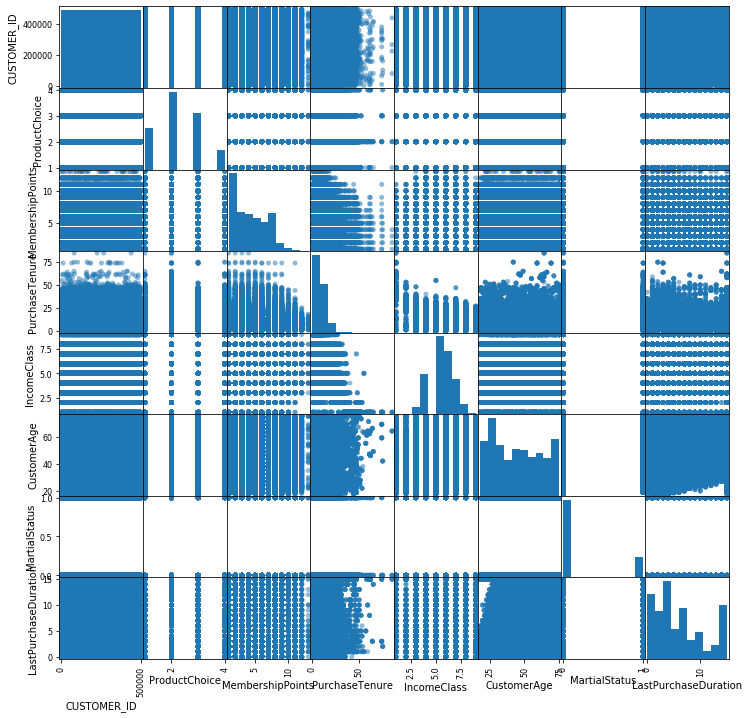

In [15]:
scatter_matrix(df, figsize=(12, 12), s=100)
plt.show()

In [75]:
df = pd.read_csv('./data/PurchasePredictionDataset.csv', sep=',')

is_P1_P3 = df.isin({'ProductChoice': [1,3]}) 

df = df[is_P1_P3['ProductChoice']]

#Customer Chose Product 1 or not 0 (product 3)
df['ProductChoice'] = df['ProductChoice'].map({3: 0, 1: 1})
df=pd.get_dummies(df)
df= pd.DataFrame(df).dropna()
df

,CUSTOMER_ID,ProductChoice,MembershipPoints,PurchaseTenure,IncomeClass,CustomerAge,MartialStatus,LastPurchaseDuration,ModeOfPayment_BankTransfer,ModeOfPayment_Cash,...,ResidentCity_Thane,ResidentCity_Vijayawada,ResidentCity_Visakhapatnam,Channel_Offline,Channel_Online,CustomerPropensity_High,CustomerPropensity_Low,CustomerPropensity_Medium,CustomerPropensity_Unknown,CustomerPropensity_VeryHigh
1,2,0,2,4,7.0,75,0,15.0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,0,2,6,4.0,26,0,6.0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,6,0,6,3,4.0,71,0,10.0,0,0,...,0,0,0,0,1,1,0,0,0,0
9,10,0,3,8,4.0,29,1,6.0,0,0,...,0,0,0,0,1,1,0,0,0,0
12,13,0,1,4,8.0,72,0,4.0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499982,499983,0,2,11,5.0,37,0,9.0,0,0,...,0,0,0,0,1,0,0,0,0,1
499987,499988,0,5,11,5.0,42,0,1.0,1,0,...,0,0,0,0,1,0,0,1,0,0
499993,499994,0,5,3,4.0,24,1,4.0,0,0,...,0,0,0,0,1,0,0,1,0,0
499995,499996,0,2,5,5.0,23,0,8.0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [84]:
# set C large to suppress regularization
X = df.loc[:, df.columns != 'ProductChoice']
y = df['ProductChoice']

model = LogisticRegression(C=1000)
model.fit(X, y)
beta0hat = model.intercept_[0]
beta1hat = model.coef_[0][0]
print("beta0 =    {0:8.3f} beta1 =    {1:8.3f}".format(beta0, beta1))
print("beta0hat = {0:8.3f} beta1hat = {1:8.3f}".format(beta0hat, beta1hat))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


beta0 =       0.000 beta1 =       0.500
beta0hat =    0.000 beta1hat =    0.000


In [85]:
model.coef_

array([[ 7.36755789e-07, -6.57978824e-04,  5.92950264e-03,
        -5.51007245e-05, -1.23466667e-02, -6.95589778e-05,
        -7.13145339e-03, -9.87183771e-06, -1.83711840e-05,
        -5.96982846e-07,  3.48327233e-05,  4.40766835e-05,
         2.61126692e-06,  1.65820266e-05, -3.56956734e-05,
         3.82583110e-05,  6.63294822e-06,  3.08759338e-05,
         4.80334600e-05,  2.10263734e-04,  8.81229039e-05,
         4.27556381e-04,  2.31660927e-05,  1.48230536e-04,
         2.28512697e-05,  1.98271247e-05,  3.63349931e-05,
         4.36305835e-06,  9.93818766e-05,  1.69664809e-05,
         4.76885254e-05, -2.03271074e-03,  3.69895696e-04,
         1.33915358e-04,  8.85262789e-05,  1.98777191e-04,
         1.35499394e-04,  2.71155745e-04, -7.92729081e-04,
        -2.04717686e-06,  1.45396472e-05,  1.17736845e-05,
         1.04731716e-04,  2.06690481e-04,  1.16783709e-05,
         6.74167118e-05, -1.14096588e-05,  6.07011181e-05,
        -7.70158363e-05,  1.46278532e-04, -3.94426523e-0

TypeError: '(slice(None, None, None), 0)' is an invalid key

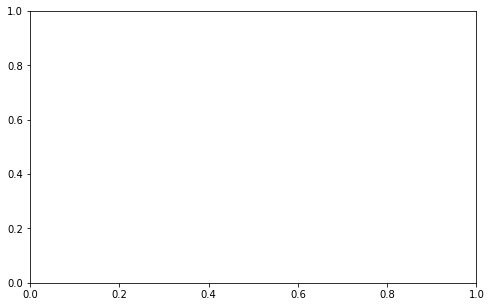

In [82]:
xpts = np.linspace(-9, 9, 100)
yhatpts = logistic(beta0hat + beta1hat * xpts)
ypts = logistic(beta0 + beta1 * xpts)

jitter = stats.uniform(-0.03,0.06).rvs(npts)

fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], y + jitter, s=10, alpha=0.5, color='blue', label="generated data")
ax.plot(xpts, ypts, 'k', label='actual curve')
ax.plot(xpts, yhatpts, 'r', label='fitted curve')
#ax.axhline(0.5, color='black')
#ax.axvline(-beta0/beta1, color='black', label='actual boundary')
ax.set_title("Fitted logistic curve")
ax.legend(loc='center right')